# Number sequences

Visit [The On-Line Encyclopedia of Integer Sequences® (OEIS®) oeis.org](http://oeis.org/)

- [Binary Representation ](#Binary-Representation)


- [Positive integers](#Positive-integers)
- [Integer squares](#Integer-squares)
- [Sqrt(n)/n](#Sqrt(n)/n)
- [Integer square root](#Integer-square-root)
- [n*(n+1)/2 sequence](#n*(n+1)/2-sequence)
- [Prime numbers](#Prime-numbers)
- [Fibonacci numbers](#Fibonacci-numbers)


- [Stern's diatomic series](#Stern's-diatomic-series)
- [Fly straight, dammit series](#Fly-straight,-dammit-series)
- [Hofstadter Q-sequence](#Hofstadter-Q-sequence)
- [Hofstadter-Conway sequence](#Hofstadter-Conway-sequence)
- [A chaotic cousin of the Hofstadter-Conway sequence](#A-chaotic-cousin-of-the-Hofstadter-Conway-sequence)

- [Langton's ant](#Langton's-ant)

You can find notebook and pip requirements in [bitbucket repository page](https://bitbucket.org/Nekrasovp/number-sequences).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%reload_ext watermark
%watermark -v -m --iversions

numpy      1.17.0
matplotlib 3.1.1
CPython 3.7.2rc1
IPython 7.7.0

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 158 Stepping 9, GenuineIntel
CPU cores  : 8
interpreter: 64bit


##  Helpers
Define functions to draw the plots

In [3]:
def show_scatter(a):
    plt.figure(figsize=(8,8))
    plt.scatter(range(len(a)), a, s=10, c='black', marker=".")
    plt.show()

In [4]:
def show_bitmatrix(a):
    plt.figure(figsize=(8,8))
    plt.imshow(a, cmap='Greys',  interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.show()

## Binary Representation 

[Binary plot on mathworld.wolfram.com](http://mathworld.wolfram.com/BinaryPlot.html)

A binary plot of an integer sequence is a plot of the binary representations of successive terms where each term is represented as a sequence of bits with 1s colored black and 0s colored white. Then each representation is stacked to form a table where each entry represents a bit in the sequence.
To make a binary plot of a sequence we need to convert each term of the sequence into its binary representation. Then we have to put this representation in a form which make us able to build the plot easily. The following function converts the sequence in a matrix where the element i-j represents is the bit j of the element i of the sequence: 

In [5]:
def seq_to_bitmatrix(s):
    # maximum number of bits used in this sequence
    maxbit = len(bin(max(s)))
    M = np.zeros((len(s),maxbit),dtype='uint8')
    for i,e in enumerate(s):
        bits = bin(e)[2:] # bin() -> 0b100, we drop 2 chars
        for j,b in enumerate(bits):
            M[i,maxbit-len(bits)+j] = int(b) # fill the matrix
    return M   

 ## Positive integers 
 
 0, 1, 2, 3...

In [6]:
posint_a = list(range(50))

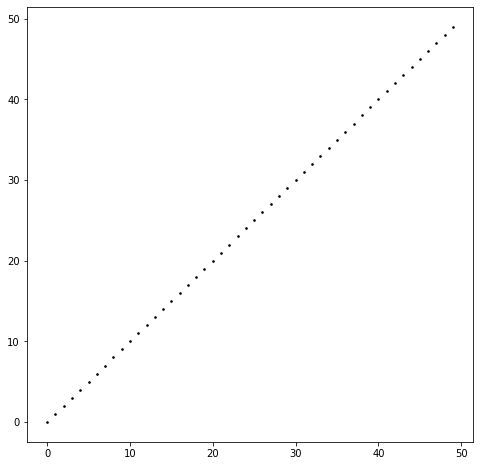

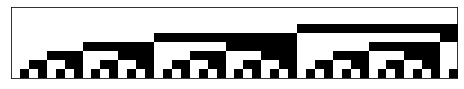

In [7]:
show_scatter(posint_a)
show_bitmatrix(seq_to_bitmatrix(posint_a).T)

## Integer squares

0, 1, 4, 9, 16, 25...

In [8]:
sqint_a = [pow(n, 2) for n in range(50)]

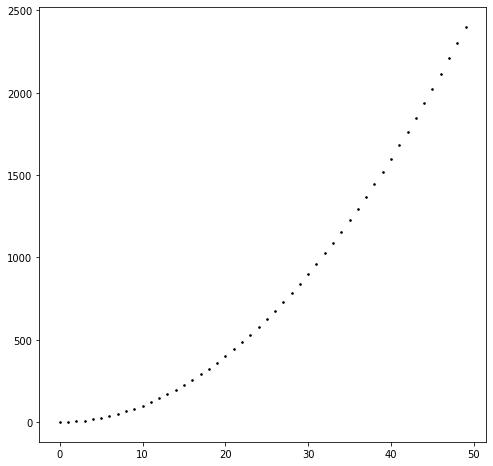

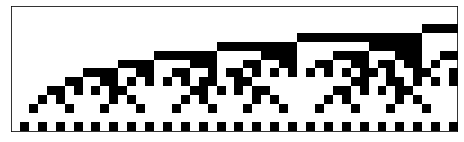

In [9]:
show_scatter(sqint_a)
show_bitmatrix(seq_to_bitmatrix(sqint_a).T)

## Sqrt(n)/n 

In [10]:
sqrtndn_a = [(np.sqrt(n)/n) for n in range(1, 1000, 1)]

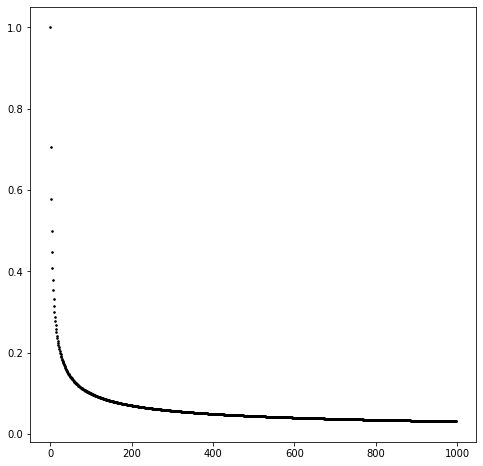

In [11]:
show_scatter(sqrtndn_a)

## Integer square root

0, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3,

In [12]:
sqrtint_a = [int(np.sqrt(n)) for n in range(500)]

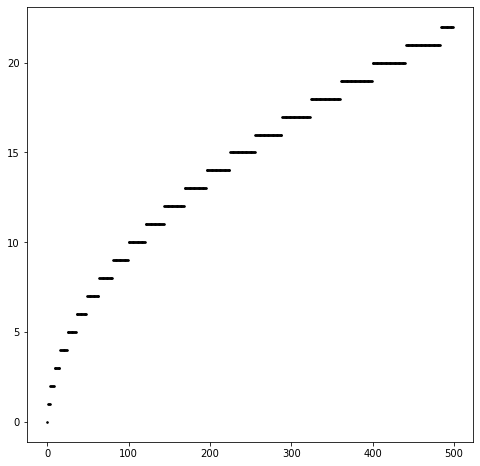

In [13]:
show_scatter(sqrtint_a)

## n*(n+1)/2 sequence

n = n*(n+1)/2

0, 1, 3, 6, 10, 15, 21...

In [14]:
s = [int(n*(n+1)/2) for n in range(100)]

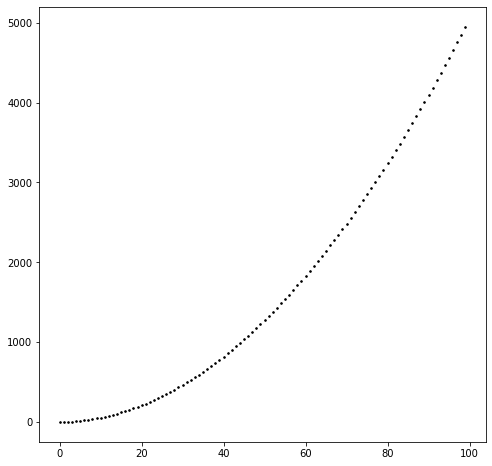

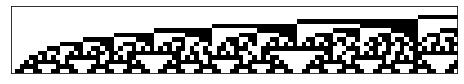

In [15]:
show_scatter(s)
show_bitmatrix(seq_to_bitmatrix(s).T)

## Prime numbers
[A000040](http://oeis.org/A000040)

The prime numbers.

In [16]:
def gen_primes():
    D = {}
    q = 2
    while True:
        if q not in D:
            yield q
            D[q * q] = [q]
        else:
            for p in D[q]:
                D.setdefault(p + q, []).append(p)
            del D[q]
        q += 1

In [17]:
f = gen_primes()
pa = [next(f) for i in range(100)]

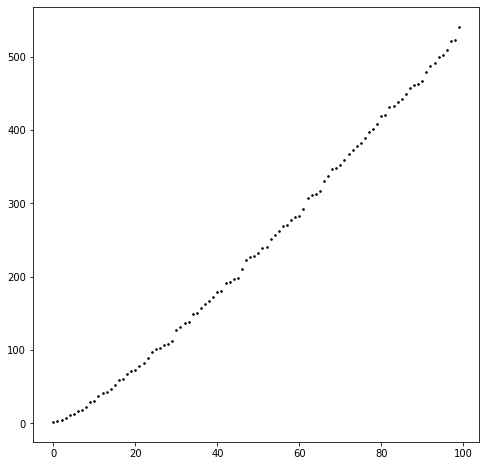

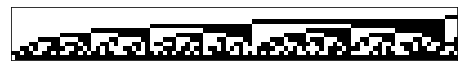

In [18]:
show_scatter(pa)
show_bitmatrix(seq_to_bitmatrix(pa).T)

## Fibonacci numbers
[A000045](http://oeis.org/A000045)

Generates the Fibonacci numbers, starting with 0

In [19]:
def fib(): 
    x, y = 0, 1 
    while 1: 
        yield x 
        x, y = y, x+y

In [20]:
f = fib()
a = [next(f) for i in range(200)]

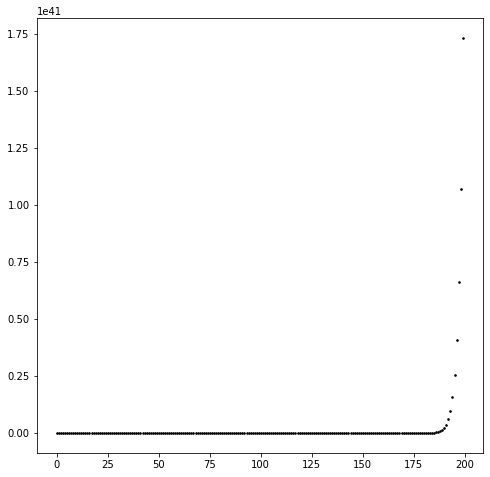

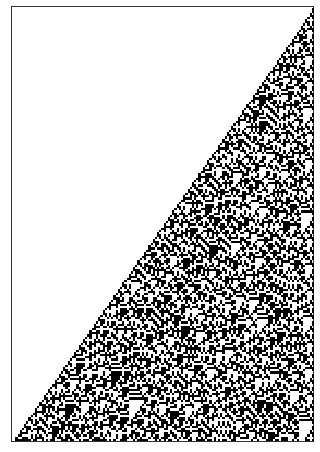

In [21]:
show_scatter(a)
show_bitmatrix(seq_to_bitmatrix(a))

## Stern's diatomic series
[A002487](https://oeis.org/A002487)

Stern's diatomic series (or Stern-Brocot sequence): a(0) = 0, a(1) = 1; for n > 0: a(2*n) = a(n), a(2*n+1) = a(n) + a(n+1).
    

In [22]:
def stern_n(n): 
    return n if n<2 else stern_n(n/2) if n%2==0 else stern_n((n - 1)/2) + stern_n((n + 1)/2)

In [23]:
stern_a = [int(stern_n(i)) for i in range(5000)]

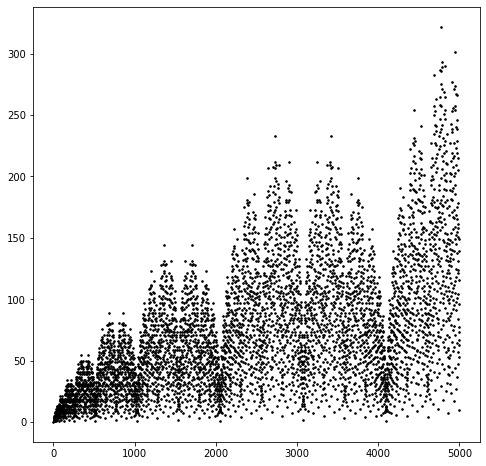

In [24]:
show_scatter(stern_a)

## Fly straight, dammit series
[A133058](https://oeis.org/A133058)

1, 1, 4, 8, 2, 8, 4, 12, 3, 1, 12, 24, 2, 16, 8, 24, 3, 21, 7, 27, 48, 16...

a(0)=a(1)=1; for n>1, a(n) = a(n-1) + n + 1 if a(n-1) and n are coprime, otherwise a(n) = a(n-1)/gcd(a(n-1),n).

In [25]:
from math import gcd
ra = {}
for n in range(1000):
    if n<=1:
        ra[n]=1
    elif gcd(int(ra[n-1]), n)==1:
        ra[n]= int(ra[n-1]+n+1)
    else:
        ra[n] = int(ra[n-1]/gcd(int(ra[n-1]), n))

In [26]:
ra_a = [v for v in ra.values()]

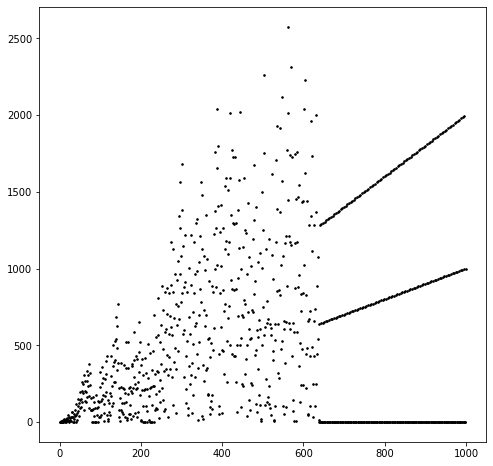

In [27]:
show_scatter(ra_a)

## Hofstadter Q-sequence
[A005185](https://oeis.org/A005185)

1, 1, 2, 3, 3, 4, 5, 5, 6, 6, 6, 8, 8, 8, 10, 9, 10, 11...

Hofstadter Q-sequence: a(1) = a(2) = 1; a(n) = a(n-a(n-1)) + a(n-a(n-2)) for n > 2.

In [28]:
hofs = {}
for n in range(10000):
    if n<=2:
        hofs[n] = 1
    else:
        hofs[n] = hofs[n-hofs[n-1]]+hofs[n-hofs[n-2]]

In [29]:
hofs_a = [v for v in hofs.values()]

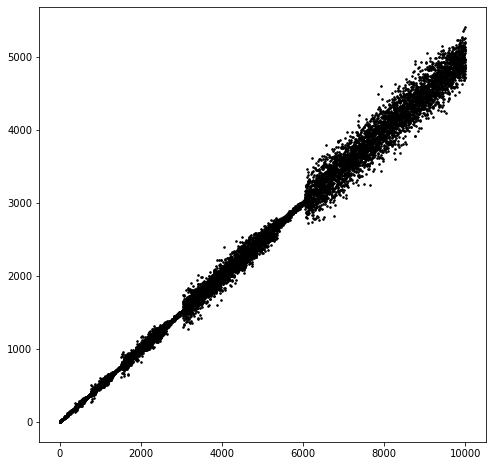

In [30]:
show_scatter(hofs_a)

## Hofstadter-Conway sequence
[A004001](https://oeis.org/A004001)

1, 1, 2, 2, 3, 4, 4, 4, 5, 6, 7, 7, 8, 8, 8, 8, 9, 10, 11, 12, 12, 13, 14, 14...

Hofstadter-Conway $10000 sequence: a(n) = a(a(n-1)) + a(n-a(n-1)) with a(1) = a(2) = 1.

In [31]:
hofsconw = {}
for n in range(1000):
    if n<=2:
        hofsconw[n] = 1
    else:
        hofsconw[n] = hofsconw[hofsconw[n-1]]+hofsconw[n-hofsconw[n-1]]

In [32]:
hofsconw_a = [v for v in hofsconw.values()]

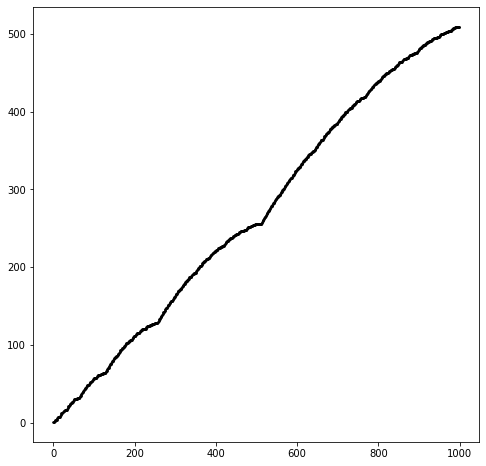

In [33]:
show_scatter(hofsconw_a)

## A chaotic cousin of the Hofstadter-Conway sequence
[A055748](https://oeis.org/A055748)

1, 1, 2, 2, 2, 3, 4, 4, 4, 4, 5, 6, 7, 8, 8, 8, 8, 8, 8, 9, 10...

a(1) = 1, a(2) = 1, a(n) = a(a(n-1)) + a(n - a(n-2) - 1) for n >= 3

In [34]:
hofsconwc = {}
for n in range(1000):
    if n<=2:
        hofsconwc[n] = 1
    else:
        hofsconwc[n] = hofsconwc[hofsconwc[n-1]]+hofsconwc[n-hofsconwc[n-2]-1]

In [35]:
hofsconwc_a = [v for v in hofsconwc.values()]

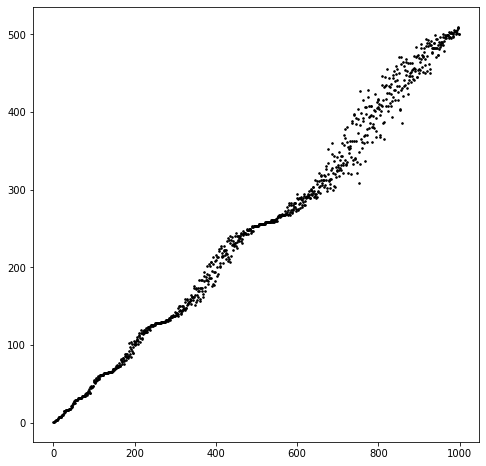

In [36]:
show_scatter(hofsconwc_a)

## Langton's ant

Wikipedia, [Langton's ant.](https://en.wikipedia.org/wiki/Langton%27s_ant)

[A274369](https://oeis.org/A274369)

Let the starting square of Langton's ant have coordinates (0, 0), with ant looking in negative x-direction. a(n) is the x-coordinate of the ant after n moves.

0, 0, 1, 1, 0, 0, -1, -1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1...

[A274370](https://oeis.org/A274370)

Let the starting square of Langton's ant have coordinates (0, 0), with the ant looking in negative x-direction. a(n) is the y-coordinate of the ant after n moves.

0, 1, 1, 0, 0, -1, -1, 0, 0, -1, -1, -2, -2, -1, -1, 0, 0, -1, -1, -2...

In [37]:
def ant(n):
    steps = [(1, 0), (0, 1), (-1, 0), (0, -1)]
    black = set()
    x = y = 0
    position = [(x, y)]
    direction = 2
    for _ in range(n):
        if (x, y) in black:
            black.remove((x, y))
            direction += 1
        else:
            black.add((x, y))
            direction -= 1
        (dx, dy) = steps[direction%4]
        x += dx
        y += dy
        position.append((x, y))
    return position

In [38]:
lang_x = ([p[0] for p in ant(15000)])

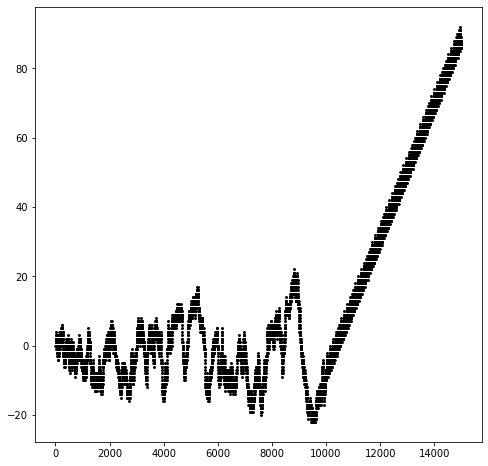

In [39]:
show_scatter(lang_x)

In [40]:
lang_y = ([p[1] for p in ant(15000)])

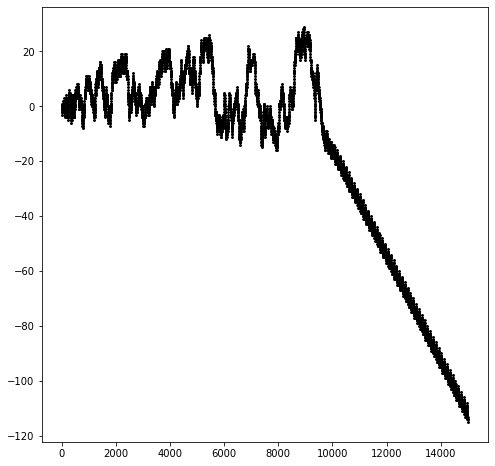

In [41]:
show_scatter(lang_y)

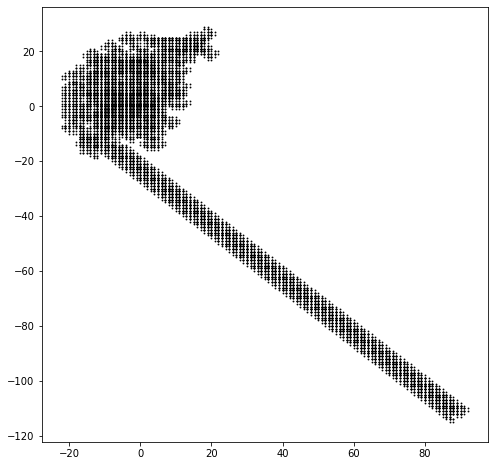

In [42]:
plt.figure(figsize=(8,8))
plt.scatter(lang_x, lang_y, s=1, c='black', marker="p")
plt.show()